In [1]:
import os,sys
sys.path.append('../../../')

In [2]:
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [3]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="kinect_v2")

c:\users\admin\pycharmprojects\open_ar_sandbox\sandbox\sensor\kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


JSON configuration loaded for sensor.
KinectV2 initialized.


In [4]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


JSON configuration loaded for projector.


Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!
Launching server at http://localhost:57373


In [5]:
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor = sensor)

KinectV2 loaded
Aruco detection ready
Aruco detection ready


In [6]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)


In [7]:
main.run()





Thread started or resumed...


In [8]:
from sandbox.modules.pytorch import LandscapeGeneration
package_dir='C:\\Users\\Admin\\PycharmProjects\\pytorch-CycleGAN-and-pix2pix\\'
landscape = LandscapeGeneration(extent=sensor.extent, package_dir=package_dir)

LoadSaveTopoModule loaded succesfully


In [9]:
main.add_module('landscape', landscape)

module landscape added to modules


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a folder t..., value='c:\\users\\admin\\pycharm...)
        [3] Markdown(str)
        [4] Button(name='Load Files in folder')
        [5] Markdown(str)
        [6] WidgetBox
            [0] RadioBoxGroup(name='Available Topographies', options=['None'], value='None')
        [7] Markdown(str)
        [8] FileSelector(directory='C:\\Users\\Admin')
        [9] Button(button_type='success', name='Load other')
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Markdown(str)
                [1] IntSlider(end=278, name='x box origin', value=40, value_throttled=40)
                [2] IntSlider(end=203, name='y box origin', value=40, value_throttled=40)
                [3] IntSlider(end=278, name='box width', value=200, value_throttled=200)
                [4] IntSlider(end=203, name='box height', value=150, value_throttled=150)
                [5] Markdown(str)
                [6] Button(button_type='success', name='Snapshot')
                [7] Markdown(str)
                [8] RadioBoxGroup(name='Show in sandbox', options=['None', 'Show topography'...], value='None')
            [1] Matplotlib(Figure, height=500)
    [2] Column
        [0] Markdown(str)
        [1] WidgetBox
            [0] Markdown(str)
            [1] IntSlider(end=50, name='Release area width', start=1, value=10, value_throttled=10)
            [2] IntSlider(end=50, name='Release area height', start=1, value=10, value_throttled=10)
            [3] RadioButtonGroup(button_type='success', name='Show or erase the areas', options=['Show', 'Erase'])
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a filename t..., value='c:\\users\\admin\\pycharm...)
        [3] Markdown(str)
        [4] Button(name='Save')
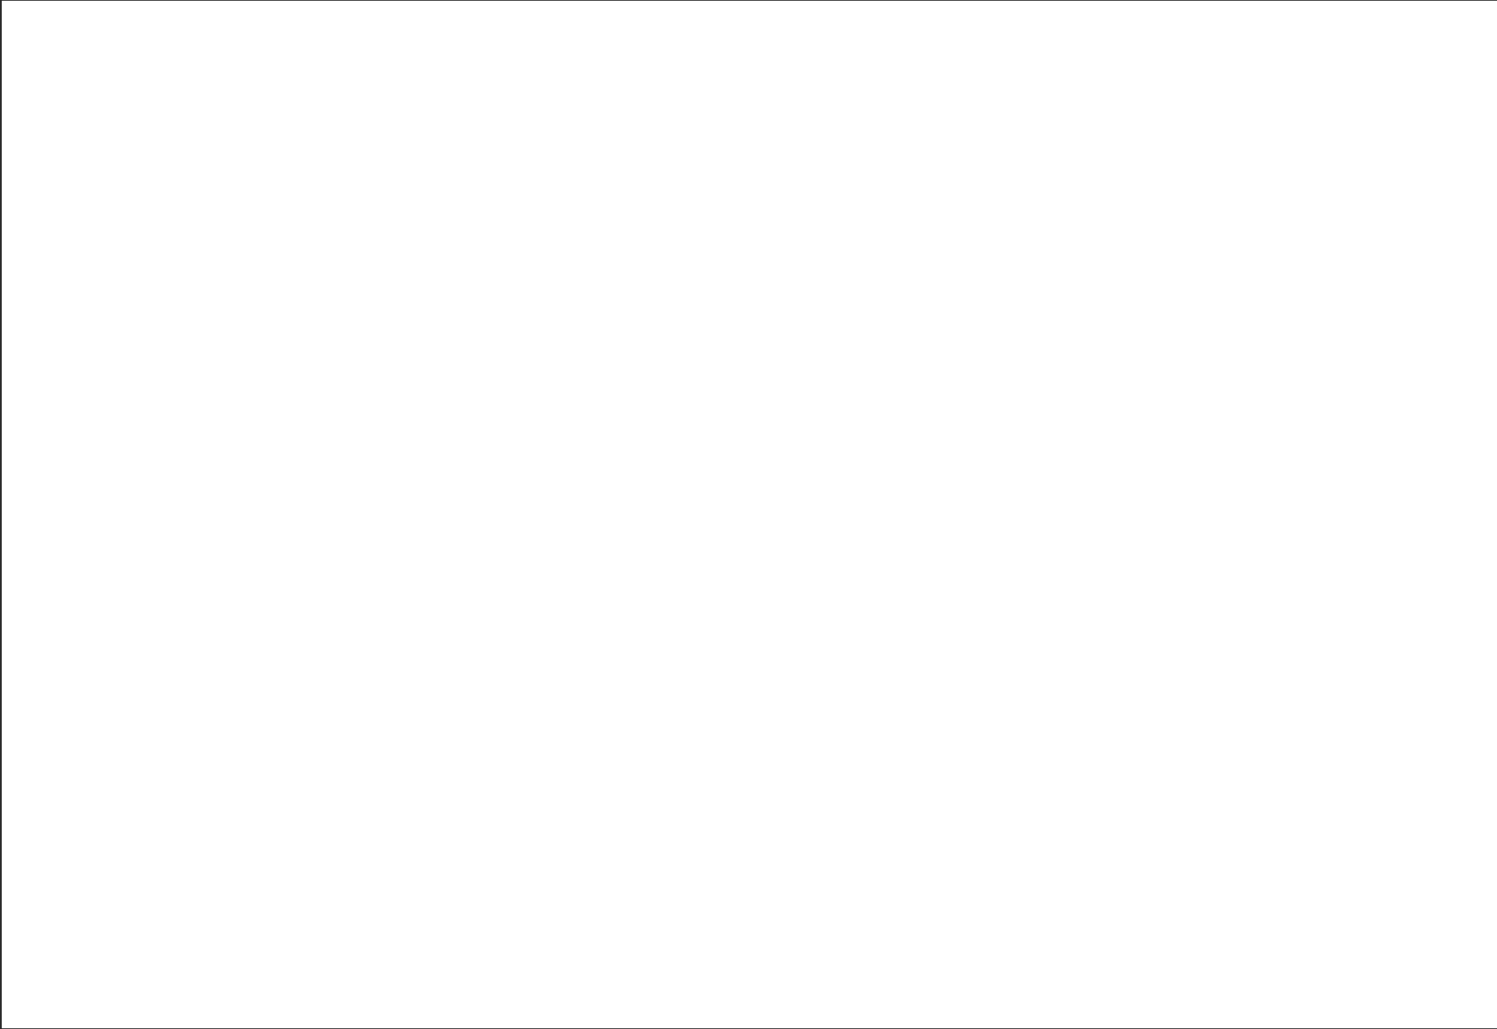

In [10]:
landscape.LoadArea.show_widgets()

In [11]:
landscape.LoadArea.extractTopo()

(array([[110.47487923, 110.35590693, 110.24555945, ..., -66.3812478 ,
         -65.95987544, -65.35167763],
        [110.24360363, 110.12214967, 109.99893516, ..., -67.55379251,
         -67.03448119, -66.30642683],
        [110.03153523, 109.91312446, 109.78327705, ..., -68.35322522,
         -67.74744437, -66.92110786],
        ...,
        [ 69.66686179,  69.50179035,  69.36768241, ..., -80.43881757,
         -79.21286854, -78.04326987],
        [ 69.64893716,  69.50146918,  69.37439682, ..., -79.77046623,
         -78.59205812, -77.45497883],
        [ 69.60423454,  69.47717182,  69.35958878, ..., -79.35016857,
         -78.19299486, -77.06279672]]),
 array([[ 0.20049887,  0.20028295,  0.20008269, ..., -0.12047413,
         -0.11970939, -0.11860559],
        [ 0.20007914,  0.19985871,  0.19963509, ..., -0.12260216,
         -0.12165968, -0.12033834],
        [ 0.19969426,  0.19947935,  0.1992437 , ..., -0.12405304,
         -0.12295362, -0.12145392],
        ...,
        [ 0.126437

In [12]:
DEM = landscape.get_image_modify()

saved succesfully in: c:\users\admin\pycharmprojects\open_ar_sandbox\sandbox/../notebooks/tutorials/09_LandscapeGeneration/saved_DEMs/test/


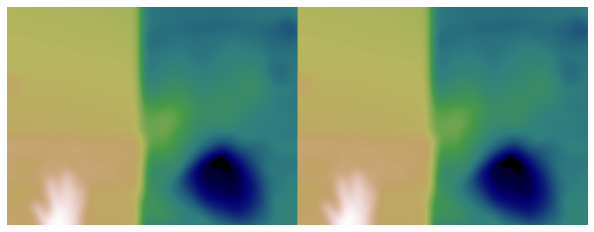

In [13]:
landscape.save_image(DEM, name = 'landscape_image.png')

In [18]:
landscape.run_cmd(package_dir=package_dir)

Landscape generated


'python C:\\Users\\Admin\\PycharmProjects\\pytorch-CycleGAN-and-pix2pix/test.py --dataroot c:\\users\\admin\\pycharmprojects\\open_ar_sandbox\\notebooks\\tutorials\\09_LandscapeGeneration\\saved_DEMs --results_dir c:\\users\\admin\\pycharmprojects\\open_ar_sandbox\\notebooks\\tutorials\\09_LandscapeGeneration\\results --checkpoints_dir c:\\users\\admin\\pycharmprojects\\open_ar_sandbox\\notebooks\\tutorials\\09_LandscapeGeneration\\checkpoints --name train_1k --model pix2pix --gpu_ids -1 --direction AtoB'

In [19]:
landscape.read_result(name = 'landscape_image.png')

Image loaded succesfully


Thread stopped.


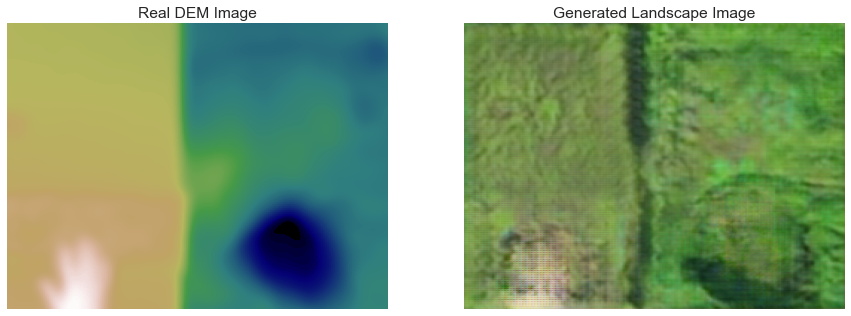

Thread started or resumed...


In [20]:
import matplotlib.pyplot as plt
main.stop()
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(landscape.DEM, origin="lower left", cmap = "gist_earth")#, extent=landscape.LoadArea.to_box_extent)
ax[0].set_title("Real DEM Image")
ax[0].set_axis_off()

ax[1].imshow(landscape.img,  extent=landscape.LoadArea.to_box_extent)
ax[1].set_title("Generated Landscape Image")
ax[1].set_axis_off()
plt.show()
main.run()

In [21]:
landscape.show_landscape=True

In [22]:
landscape.show_landscape=False

In [23]:












main.stop()

Thread stopped.
